# Example of iCCD class
### Subclass of Trs(), so most functions are identical with Ta

In [23]:
%load_ext autoreload
%autoreload 2
from analysis import *
import pathlib as p

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
## fill in the path to the analysis folder
folder = p.Path('C:/Users/David Palecek/Documents/Python_projects/AnalysisCBR/cbr_analysis_v0/analysis/')
d = Iccd(
    folder.joinpath('data/iCCD_data/f887_sol_0p2s_30uw_100accu_sig.asc'),
)

folder C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\iCCD_data\Figs exists.
loading data: C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\iCCD_data\f887_sol_0p2s_30uw_100accu_sig.asc


In [25]:
d.t

array([ 0., 10., 20., 30.])

In [26]:
len(d.wl)

2047

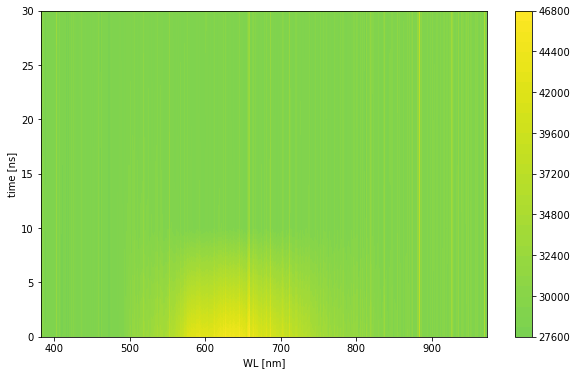

In [8]:
d.plot_2d()

In [9]:
## correct BGD
d.rem_bg()

No sweeps
running recalc.


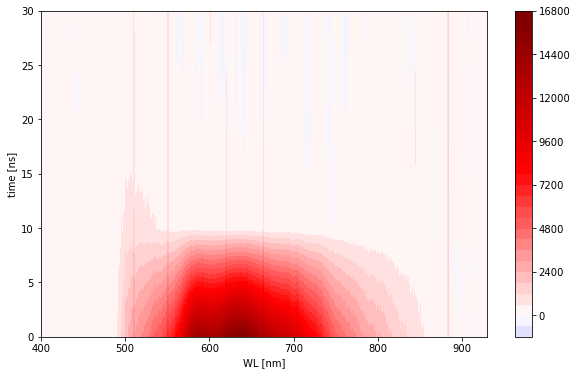

In [10]:
d.cut_wl(400,930)  # in time axis use .cut_t() 
d.plot_2d(cmap='seismic')

In [11]:
d.calc_kin([500,600, 600,700, 650,800])
d.calc_spe([1,2, 2,5, 5,10, 20,50])

In [12]:
d.kin

[array([7555.52601156,  431.54046243,   96.34682081,    7.61560694]),
 array([13683.12427746,    71.02890173,   -21.84104046,   -32.32080925]),
 array([7929.19001919,   18.86564299,  -12.91170825,  -20.45297505])]

Unknown normalization method


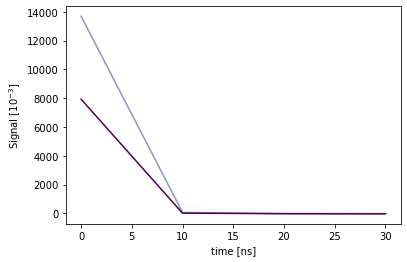

In [16]:
d.plot_kin(yscale='linear', norm='no', cmap='BuPu')

Unknown normalization method


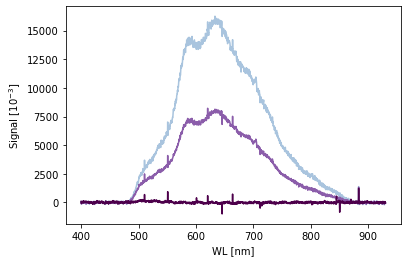

In [17]:
d.plot_spe(norm='no', cmap='BuPu')

In [18]:
## remove spikes
d.despike_data(0)

Unknown normalization method


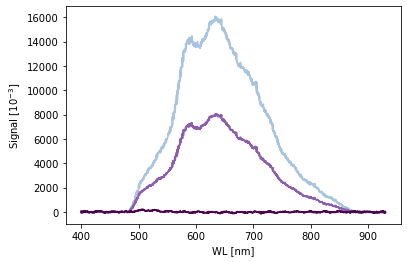

In [20]:
d.calc_spe([1,2, 2,5, 5,10, 20,50])
d.plot_spe(norm='no', cmap='BuPu')

In [22]:
d.bg.shape

(2047,)

Calibration: True
 Bgd subtracted: False
 Data combined: False
 Filter: False
Background Subtracted
recalibrating data...


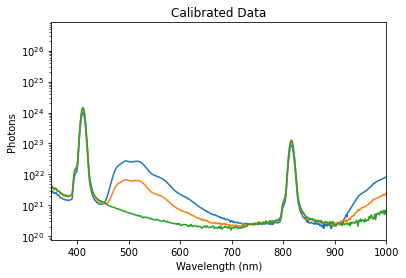

In [4]:
f2 = dpl.plot_plqe(yscale='log', xlim=(350,1000))
dpl.rem_bg(760)

Calibration: True
 Bgd subtracted: True
 Data combined: False
 Filter: False


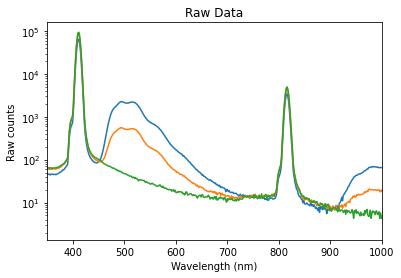

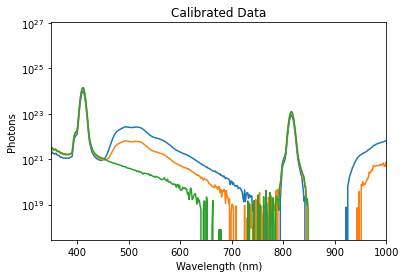

In [5]:
f3 = dpl.plot_plqe_raw(yscale='log', xlim=(350,1000))
f3 = dpl.plot_plqe(yscale='log', xlim=(350,1000))

Calibration: True
 Bgd subtracted: True
 Data combined: False
 Filter: False
The absorption between (395, 420) nm is: 0.26760066161503326
The PLQE between (460, 700) nm is: 49.01 %


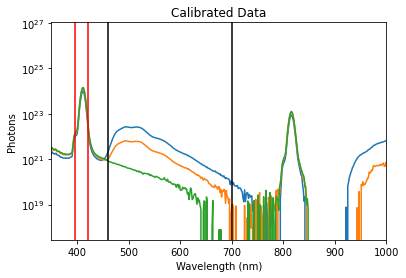

In [6]:
dpl.calc_plqe(exc_wl=(395,420), pl_wl=(460,700), xlim=(350,1000), yscale='log')

## Vis and IR PLQE

In [7]:
pl = Plqe(
    folder.joinpath('data\\PLQE\\1.3\\TIPS_TACA_PBS'),
    setup='CPT',
    footer=35,
    delimiter=''
)

Class instance of <class 'analysis.experiments.plqe.Plqe'>
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_ONLAS.asc as ONLAS
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_OFFLAS.asc as OFFLAS
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_850LP_ONPL.asc as ONPL
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_850LP_OFFPL.asc as OFFPL
LOADING: TIPS_TACA_PBS_1p3eV_1000uW_InGaAs_5x5s_NO.asc as NO
Measurements combined
PLQE experimental data


In [8]:
pl.data_raw.shape

(776, 3)

In [9]:
pl.calibrate(detector='InGaAs',center_wl=[800,1200])

detector already defined: InGaAs
center WL is [800, 1200]
Calibrating current RawData:


['ONLAS', 'OFFLAS', 'ONPL', 'OFFPL', 'NO']
Calibration: True
 Bgd subtracted: False
 Data combined: True
 Filter: False
Background Subtracted
recalibrating data...


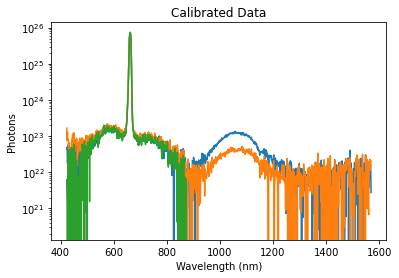

In [10]:
print(pl.key)
# pl.plot_plqe(type='Cal',yscale='log',xmin=500,xmax=1400)
f = pl.plot_plqe(yscale='log') 
#Xan remove background or reset all manipulations to rawdata.
pl.rem_bg(800)
#data.resetDefVals()

Calibration: True
 Bgd subtracted: True
 Data combined: True
 Filter: False
The absorption between [640, 680] nm is: 0.07164829881600043
The PLQE between [880, 1350] nm is: 37.19 %


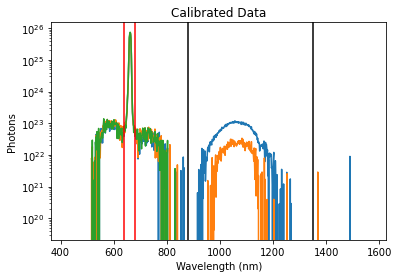

In [11]:
## Calculating the PLQE
pl.calc_plqe(exc_wl=[640,680],pl_wl = [880,1350], yscale='log')